In [34]:
from neural_priors.utils.data import Subject

In [35]:
from braincoder.models import LogGaussianPRF

In [36]:
session = 1
sub = Subject('04')

behavior = sub.get_behavioral_data(session=session, tasks=['estimation_task', ]).droplevel([0, 1, -1])

mask = sub.get_brain_mask(session, epi_space=True)

In [37]:
pars =sub.get_prf_parameters_volume(session, 2, cross_validated=True, smoothed=True)


data = sub.get_single_trial_estimates(1, smoothed=True)

In [40]:
paradigm = behavior['n']

In [ ]:
model = LogGaussianPRF()

In [21]:
pars['cvr2_null'] = pars['cvr2'].isnull()

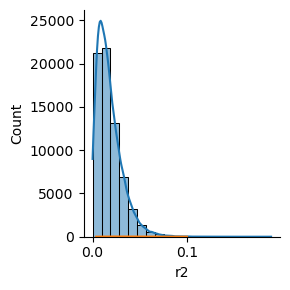

In [22]:
import seaborn as sns
g = sns.FacetGrid(pars, hue='cvr2_null')

g.map(sns.histplot, 'r2', bins=20, kde=True)

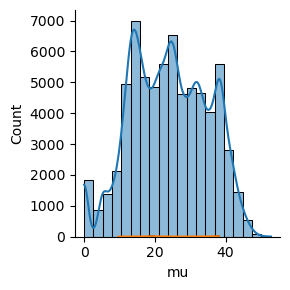

In [23]:
g = sns.FacetGrid(pars, hue='cvr2_null')
g.map(sns.histplot, 'mu', bins=20, kde=True)

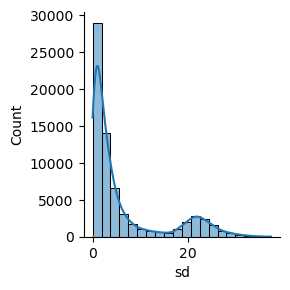

In [24]:
g = sns.FacetGrid(pars, hue='cvr2_null')
g.map(sns.histplot, 'sd', bins=20, kde=True)

In [5]:
pars[pars.cvr2.isnull()]

parameter,mu,sd,amplitude,baseline,r2,cvr2
155,32.485039,0.369161,0.678891,0.143635,0.027626,NaN
158,35.180454,1.733317,0.212845,0.159157,0.008885,NaN
172,32.243198,0.773526,0.660054,0.234728,0.048150,NaN
217,30.205788,0.905306,0.414193,0.143611,0.017354,NaN
225,29.454988,0.358589,1.230430,0.033704,0.046900,NaN
...,...,...,...,...,...,...
77625,32.959393,0.190096,0.802028,-0.558830,0.018282,NaN
77627,38.151180,1.465858,0.282234,-0.054559,0.023179,NaN
77630,38.126732,0.593015,0.595017,0.131534,0.017561,NaN
77635,38.865410,2.488205,0.295372,-0.042606,0.023113,NaN


In [39]:
from nilearn.maskers import NiftiMasker
import pandas as pd
import os.path as op

def get_prf_parameters_volume(self, session, 
        run=None,
        smoothed=False,
        cross_validated=True,
        keys=None,
        roi=None,
        return_image=False):

    dir = 'encoding_model'

    if cross_validated:
        if run is None:
            raise Exception('Give run')

        dir += '.cv'

    dir += '.denoise'

    if smoothed:
        dir += '.smoothed'

    parameters = []

    if keys is None:
        keys = ['mu', 'sd', 'amplitude', 'baseline', 'r2', 'cvr2']

    mask = self.get_volume_mask(session=session, roi=roi, epi_space=True)
    masker = NiftiMasker(mask)

    for parameter_key in keys:
        if cross_validated:
            fn = op.join(self.bids_folder, 'derivatives', dir, f'sub-{self.subject_id}', f'ses-{session}', 
                    'func', f'sub-{self.subject_id}_ses-{session}_run-{run}_desc-{parameter_key}.optim_space-T1w_pars.nii.gz')
        else:
            if parameter_key == 'cvr2':
                fn = op.join(self.bids_folder, 'derivatives', dir.replace('encoding_model', 'encoding_model.cv'), f'sub-{self.subject_id}', f'ses-{session}', 
                        'func', f'sub-{self.subject_id}_ses-{session}_desc-{parameter_key}.optim_space-T1w_pars.nii.gz')
            else:
                fn = op.join(self.bids_folder, 'derivatives', dir, f'sub-{self.subject_id}', f'ses-{session}', 
                        'func', f'sub-{self.subject_id}_ses-{session}_desc-{parameter_key}.optim_space-T1w_pars.nii.gz')
        
        print(fn)
        pars = pd.Series(masker.fit_transform(fn).ravel())
        print(pars.isnull().sum())
        parameters.append(pars)

    parameters =  pd.concat(parameters, axis=1, keys=keys, names=['parameter'])

    if return_image:
        return masker.inverse_transform(parameters.T)

    return parameters


/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.smoothed/sub-09/ses-1/func/sub-09_ses-1_run-1_desc-mu.optim_space-T1w_pars.nii.gz
0
/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.smoothed/sub-09/ses-1/func/sub-09_ses-1_run-1_desc-sd.optim_space-T1w_pars.nii.gz
0
/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.smoothed/sub-09/ses-1/func/sub-09_ses-1_run-1_desc-amplitude.optim_space-T1w_pars.nii.gz
0
/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.smoothed/sub-09/ses-1/func/sub-09_ses-1_run-1_desc-baseline.optim_space-T1w_pars.nii.gz
0
/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.smoothed/sub-09/ses-1/func/sub-09_ses-1_run-1_desc-r2.optim_space-T1w_pars.nii.gz
0
/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.smoothed/sub-09/ses-1/func/sub-09_ses-1_run-1_desc-cvr2.optim_space-T1w_pars.nii.gz
0


parameter,mu,sd,amplitude,baseline,r2,cvr2
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
77636,21.507187,0.743598,0.483173,-0.107037,0.048297,-0.068480
77637,21.296434,0.544088,1.093706,-0.003824,0.079066,-0.103980
77638,37.530392,1.885537,0.641537,0.203268,0.019592,0.000000
77639,15.386480,1.204121,0.473702,-0.004719,0.021103,0.017518


In [67]:
from nilearn.masking import apply_mask

In [74]:
session = 1
roi = None
mask = sub.get_volume_mask(session=session, roi=roi, epi_space=True)
# masker = NiftiMasker(mask, clean_ensure_finite=False)
# tmp = image.load_img('/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.smoothed/sub-09/ses-1/func/sub-09_ses-1_run-1_desc-cvr2.optim_space-T1w_pars.nii.gz').get_fdata()

# np.isnan(tmp).sum()

# tmp = masker.fit_transform('/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.smoothed/sub-09/ses-1/func/sub-09_ses-1_run-1_desc-cvr2.optim_space-T1w_pars.nii.gz')
tmp = apply_mask('/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.smoothed/sub-09/ses-1/func/sub-09_ses-1_run-1_desc-cvr2.optim_space-T1w_pars.nii.gz', 
                  mask, ensure_finite=False)

In [75]:
np.isnan(tmp).sum()

12966

In [61]:
mask_ = image.load_img(mask).get_fdata() == 1.0
tmp = image.load_img('/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.smoothed/sub-09/ses-1/func/sub-09_ses-1_run-1_desc-cvr2.optim_space-T1w_pars.nii.gz').get_fdata()

np.isnan(tmp[mask_]).sum()

12966

In [51]:
masker.get_params()

{'detrend': False,
 'dtype': None,
 'high_pass': None,
 'high_variance_confounds': False,
 'low_pass': None,
 'mask_args': None,
 'mask_img': <nibabel.nifti1.Nifti1Image at 0x177ac6770>,
 'mask_strategy': 'background',
 'memory': Memory(location=None),
 'memory_level': 1,
 'reports': True,
 'runs': None,
 'smoothing_fwhm': None,
 'standardize': False,
 'standardize_confounds': True,
 't_r': None,
 'target_affine': None,
 'target_shape': None,
 'verbose': 0}

In [ ]:
mask.

In [48]:
np.isnan(tmp).sum()

0

In [33]:
pars.cvr2.isnull().sum()

0

In [21]:
from nilearn import image
import numpy as np

In [22]:
cvr2 = image.load_img('/data/ds-neuralpriors/derivatives/encoding_model.cv.denoise.smoothed/sub-02/ses-1/func/sub-02_ses-1_run-1_desc-cvr2.optim_space-T1w_pars.nii.gz')

In [23]:

tmp = cvr2.get_fdata()

In [24]:
np.isnan(tmp).sum()

810